In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

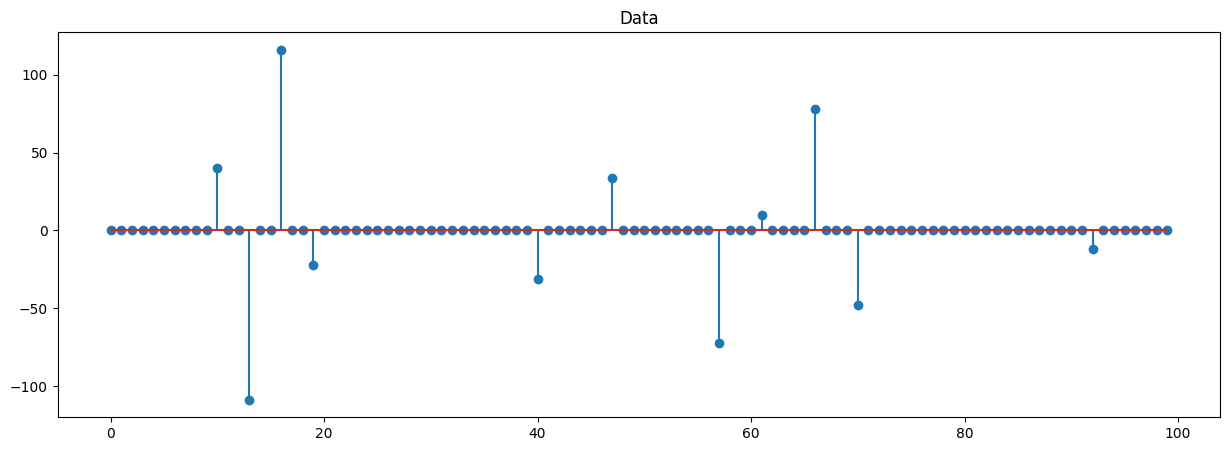

In [189]:


def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200363 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)

plt.show()

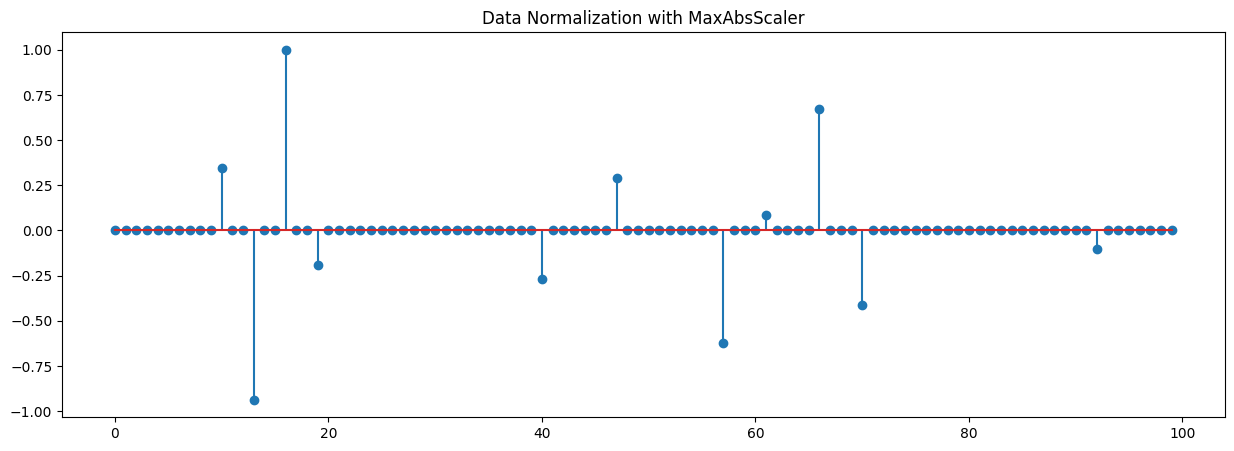

In [190]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
norm_max_abs = scaler.fit_transform(signal)

signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data Normalization with MaxAbsScaler")
plt.stem(norm_max_abs)

plt.show()

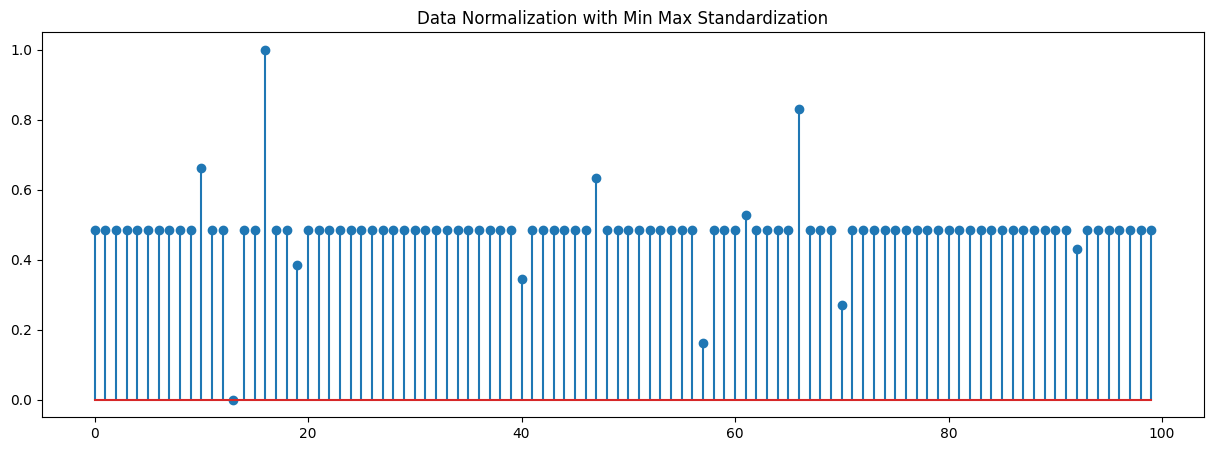

In [191]:
def min_max_norm(signal) :
    minimum = np.min(signal)
    maximum = np.max(signal)
    signal_norm = (signal - minimum) / (maximum - minimum)
    return signal_norm

norm_min_max = min_max_norm(signal)

signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data Normalization with Min Max Standardization")
plt.stem(norm_min_max)

plt.show()


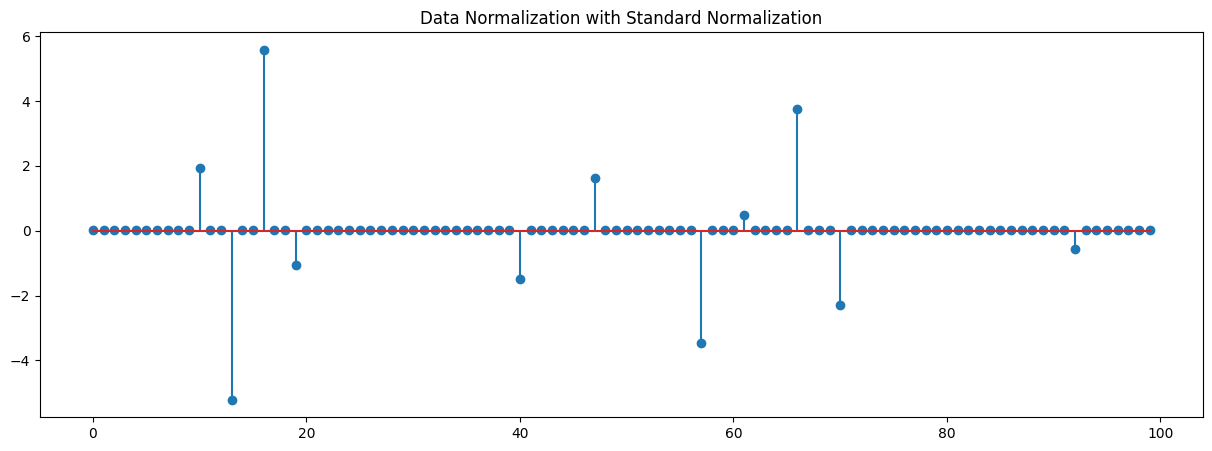

In [192]:
def standard_normalization(signal) :
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    signal_norm = (signal - mean_val) / std_val
    return signal_norm

norm_stand = standard_normalization(signal)

signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data Normalization with Standard Normalization")
plt.stem(norm_stand)

plt.show()

In [193]:
print("Number of non zeros in the 4 plots")
print("Signal", np.count_nonzero(signal))
print("MaxAbs Scaler", np.count_nonzero(norm_max_abs))
print("Min-Max Data", np.count_nonzero(norm_min_max))
print("Standardized Data", np.count_nonzero(norm_stand))



Number of non zeros in the 4 plots
Signal 11
MaxAbs Scaler 11
Min-Max Data 99
Standardized Data 100


*Q2*

In [232]:
file_path = r'Advertising.csv'
df  = pd.read_csv(file_path)

feature_labels = df.columns.tolist()
df.drop(columns=['sample index'], inplace=True)
feature_labels = feature_labels[1:-1]

print(df.head()) # default first five data
print(feature_labels)


      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
['TV', 'radio', 'newspaper']


In [233]:
x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=1)
print(x_train[:5])

        TV  radio  newspaper
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4


In [234]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [235]:
print("Coeffiecients : " ,model.coef_)
print("Intercept : ", model.intercept_)


Coeffiecients :  [0.0468431  0.17854434 0.00258619]
Intercept :  2.907947020816433


In [236]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(y_test_pred[:5])

[21.73577184 16.45693776  7.65993185 17.89202679 18.67730671]


In [237]:
rss = np.sum((y_test - y_test_pred)**2)
mse = mean_squared_error(y_test, y_test_pred)

N = len(x_train)
d = len(model.coef_) + 1

rse = np.sqrt(rss / (N-d))

r2 = r2_score(y_test, y_test_pred)


In [238]:
print("RSS : ", rss)
print("RSE : ", rse)
print("MSE : ", mse)
print("R2 score : ", r2)

RSS :  79.67542207315164
RSE :  0.7146606782832713
MSE :  1.991885551828791
R2 score :  0.8927605914615384


In [239]:
import statsmodels.api as sm

X_train = sm.add_constant(x_train)
model = sm.OLS(y_train, X_train).fit()
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     447.7
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           2.12e-76
Time:                        14:24:07   Log-Likelihood:                -315.37
No. Observations:                 160   AIC:                             638.7
Df Residuals:                     156   BIC:                             651.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9079      0.349      8.339      0.0

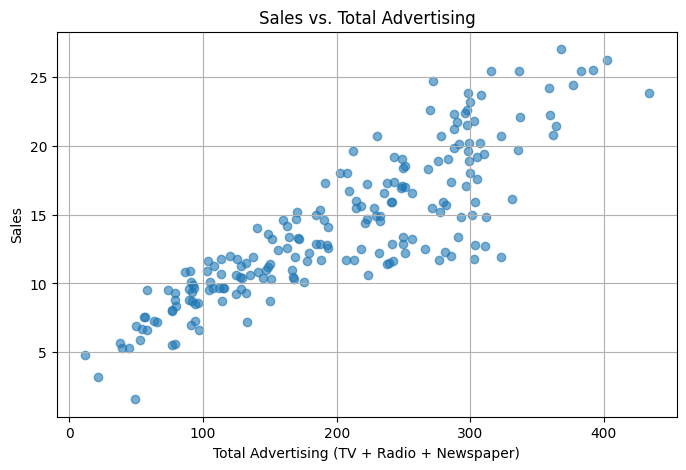

In [240]:
df['total_advertising'] = df['TV'] + df['radio'] + df['newspaper']

plt.figure(figsize=(8, 5))
plt.scatter(df['total_advertising'], df['sales'], alpha=0.6)
plt.xlabel('Total Advertising (TV + Radio + Newspaper)')
plt.ylabel('Sales')
plt.title('Sales vs. Total Advertising')
plt.grid(True)
plt.show()

*when the total budget gets higher, sales get higher*

In [241]:
type(x_train['TV'])

pandas.core.series.Series

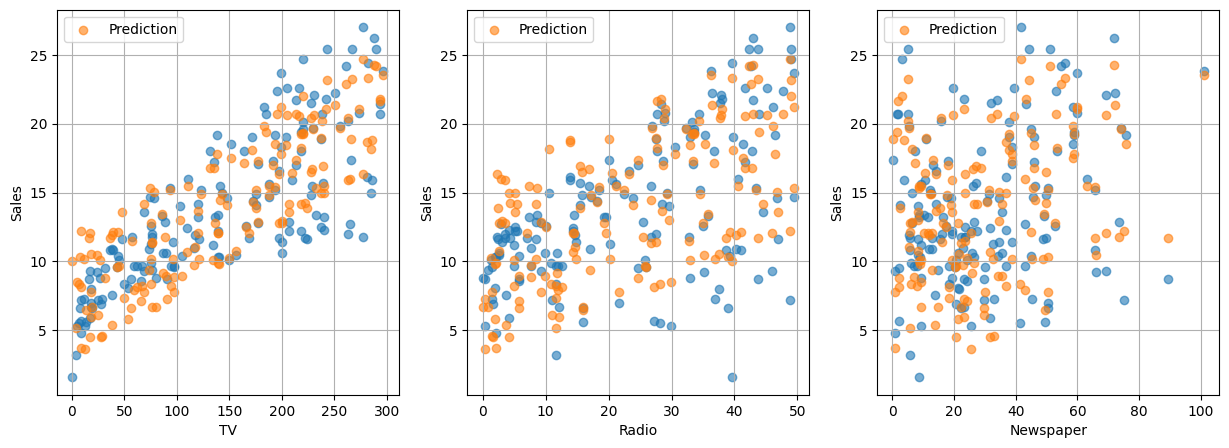

In [242]:
#Plots of training data
fig, ax = plt.subplots(1,3, figsize = (15,5))

ax[0].scatter(x_train['TV'], y_train, alpha=0.6)
ax[0].scatter(x_train['TV'], y_train_pred, alpha=0.6 , label = 'Prediction')
ax[0].legend()
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')
ax[0].grid(True)

ax[1].scatter(x_train['radio'], y_train, alpha=0.6)
ax[1].scatter(x_train['radio'], y_train_pred, alpha=0.6 , label = 'Prediction')
ax[1].legend()
ax[1].set_xlabel('Radio')
ax[1].set_ylabel('Sales')
ax[1].grid(True)

ax[2].scatter(x_train['newspaper'], y_train, alpha=0.6)
ax[2].scatter(x_train['newspaper'], y_train_pred, alpha=0.6 , label = 'Prediction')
ax[2].legend()
ax[2].set_xlabel('Newspaper')
ax[2].set_ylabel('Sales')
ax[2].grid(True)

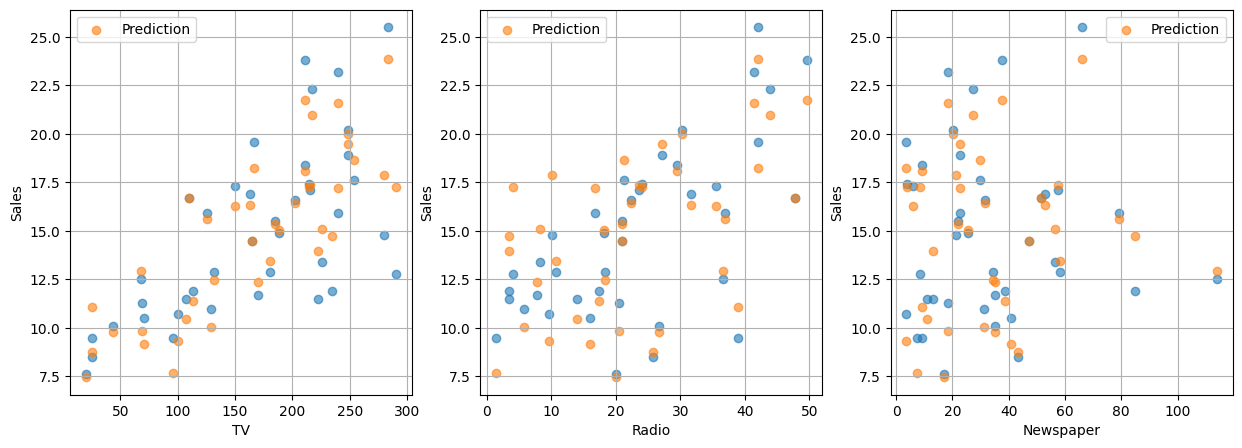

In [243]:
#Plots of test data
fig, ax = plt.subplots(1,3, figsize = (15,5))

ax[0].scatter(x_test['TV'], y_test, alpha=0.6)
ax[0].scatter(x_test['TV'], y_test_pred, alpha=0.6 , label = 'Prediction')
ax[0].legend()
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')
ax[0].grid(True)

ax[1].scatter(x_test['radio'], y_test, alpha=0.6)
ax[1].scatter(x_test['radio'], y_test_pred, alpha=0.6 , label = 'Prediction')
ax[1].legend()
ax[1].set_xlabel('Radio')
ax[1].set_ylabel('Sales')
ax[1].grid(True)

ax[2].scatter(x_test['newspaper'], y_test, alpha=0.6)
ax[2].scatter(x_test['newspaper'], y_test_pred, alpha=0.6 , label = 'Prediction')
ax[2].legend()
ax[2].set_xlabel('Newspaper')
ax[2].set_ylabel('Sales')
ax[2].grid(True)

*Q3*

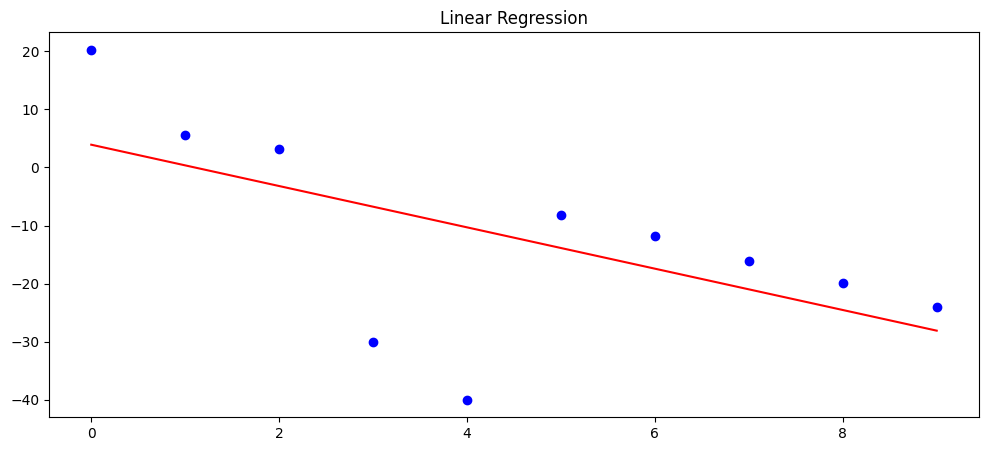

In [206]:
xi = np.array([0,1,2,3,4,5,6,7,8,9])
yi = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03])

xi = xi.reshape(-1,1)
model = LinearRegression()
model.fit(xi, yi)

predicted_y = model.predict(xi)

plt.figure(figsize=(12,5))
plt.subplot(1, 1, 1)
plt.title("Linear Regression")
plt.scatter(xi, yi, color='blue')
plt.plot(xi, predicted_y, color='red')
plt.show()